# Step 1: Data Collection

In [161]:
!pip install -U scikit-learn

##Step 1: Install Necessary Libraries

In [162]:
!pip install sqlalchemy==1.3.9

  Using cached SQLAlchemy-1.3.9-cp311-cp311-win_amd64.whl
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.31
    Uninstalling SQLAlchemy-2.0.31:
      Successfully uninstalled SQLAlchemy-2.0.31


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.


In [163]:
!pip install ipython-sql

  Using cached SQLAlchemy-2.0.31-cp311-cp311-win_amd64.whl.metadata (9.9 kB)
Using cached SQLAlchemy-2.0.31-cp311-cp311-win_amd64.whl (2.1 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [165]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [166]:
import csv, sqlite3

In [167]:
import requests
import datetime

In [168]:
# print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [169]:
# read dataset and display the first 5 rows
df = pd.read_csv('sales_data.csv')
df.head()


,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


# Step 2: Data Cleaning

In [170]:
# identify the data types for each column
df.dtypes

date         object
product      object
category     object
price       float64
quantity    float64
revenue     float64
dtype: object

In [171]:
#calculate missing values
df.isnull().sum()/len(df)*100

date        0.000000
product     0.000000
category    0.000000
price       0.542005
quantity    0.271003
revenue     0.271003
dtype: float64

In [172]:
# using value_counts() for the different types of products
df['product'].value_counts().to_frame()

,count
product,
Smartphone,82
T-Shirt,38
Smartwatch,36
Coat,35
Speaker,25
Backpack,24
Hoodie,24
Sneakers,24
Jeans,24


In [173]:
df.describe()

,price,quantity,revenue
count,367.000000,368.000000,368.000000
mean,211.226158,14.565217,2060.679348
std,227.335170,8.595740,1910.930790
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,300.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


In [174]:
#printing the number of missing values based on what was found 
print("number of NaN values for the column price :", df['price'].isnull().sum())
print("number of NaN values for the column quantity :", df['quantity'].isnull().sum())
print("number of NaN values for the column revenue :", df['revenue'].isnull().sum())

number of NaN values for the column price : 2
number of NaN values for the column quantity : 1
number of NaN values for the column revenue : 1


##### One of the methods to clean the data is to replace the missing values with the mean of the column 

In [175]:
#replacing missing values of the column 'price' with the mean using replace() method
price_mean = df['price'].mean()
df['price'].replace(np.nan,price_mean,inplace = True)

In [176]:
#replacing missing values of the column 'quantity' with the mean using replace() method
quantity_mean = df['quantity'].mean()
df['quantity'].replace(np.nan,quantity_mean,inplace = True)

In [177]:
#replacing missing values of the column 'revenue' with the mean using replace() method
revenue_mean = df['revenue'].mean()
df['revenue'].replace(np.nan,revenue_mean,inplace = True)

In [178]:
#checking for any missing values
print("number of NaN values for the column price :", df['price'].isnull().sum())
print("number of NaN values for the column quantity :", df['quantity'].isnull().sum())
print("number of NaN values for the column revenue :", df['revenue'].isnull().sum())

number of NaN values for the column price : 0
number of NaN values for the column quantity : 0
number of NaN values for the column revenue : 0


In [179]:
df['product'].value_counts().to_frame()

,count
product,
Smartphone,82
T-Shirt,38
Smartwatch,36
Coat,35
Speaker,25
Backpack,24
Hoodie,24
Sneakers,24
Jeans,24


##### Often times, people usually do spelling mistakes which can affect the dataset. To fix this issue, we use the 'str.replace()' method to rename the column values appropriately

In [180]:
df['category'].value_counts().to_frame()

,count
category,
Electronics,130
Clothing,120
Accessories,70
Bags,23
Shoes,23
Clohting,1
Bgas,1
Shoeses,1


In [181]:
#renaming the column value 'Bgas' 
df['category'] = df['category'].str.replace('Bgas','Bags')

In [182]:
#renaming the column value 'Shoeses' 
df['category'] = df['category'].str.replace('Shoeses','Shoes')

In [183]:
#renaming the column value 'Clohting' 
df['category'] = df['category'].str.replace('Clohting','Clothing')

##### After fixing the spelling mistakes for the values, we then notice that 'Clothing', 'Bags' and 'Shoes' have been increased by 1, making it easier to use the column without spelling concerns

In [184]:
df['category'].value_counts().to_frame()

,count
category,
Electronics,130
Clothing,121
Accessories,70
Bags,24
Shoes,24


In [185]:
# Convert float64 columns to int64 using astype()
df['quantity'] = df['quantity'].astype('int64')
df['price'] = df['price'].astype('int64')
df['revenue'] = df['revenue'].astype('int64')

In [186]:
#checking the datatypes
df.dtypes

date        object
product     object
category    object
price        int64
quantity     int64
revenue      int64
dtype: object

In [187]:
#converting the 'date' column from object (i.e string) to datetime data type
df['date'] = df['date'].astype('datetime64[ns]')

In [188]:
df.dtypes

date        datetime64[ns]
product             object
category            object
price                int64
quantity             int64
revenue              int64
dtype: object

In [189]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600,10,6000
1,2022-01-01,Laptop,Electronics,1200,5,6000
2,2022-01-02,T-Shirt,Clothing,20,50,1000
3,2022-01-03,Headphones,Electronics,100,20,2000
4,2022-01-04,T-Shirt,Clothing,20,25,500


# Step 3: Data Analysis

### Q1) What was the total revenue generated by the company over the course of the year?

In [190]:
#using the sum() method, we can find the total revenue generated by the company over the course of the year
df['revenue'].sum()

760390

### Q2) Which product had the highest revenue? How much revenue did it generate?

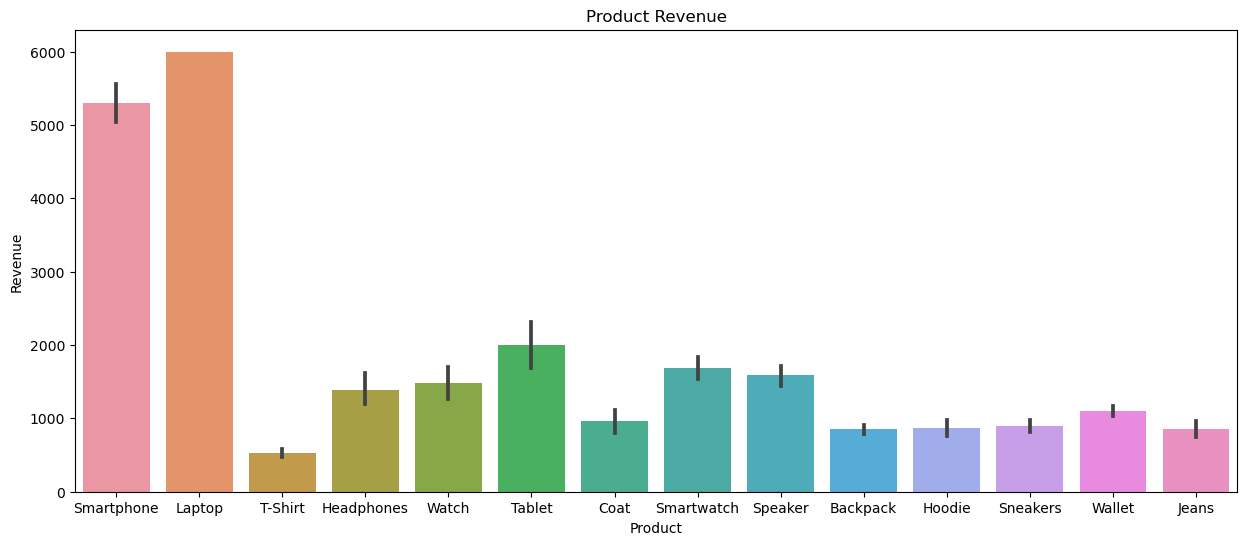

In [191]:
plt.figure(figsize=(15,6))
sns.barplot(x='product', y='revenue', data=df)
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Product Revenue")
plt.show()

###### Based on the figure above, Laptops had the highest revenue

### To find out the revenue of 'Laptop', I transformed the data to SQL format

In [192]:
%reload_ext sql

In [193]:
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [194]:
%sql sqlite:///my_data1.db

In [195]:
df.to_sql("SALESDATA", con, if_exists='replace', index=False,method="multi")

369

In [196]:
%sql create table SALESDATATABLE as select * from SALESDATA where Date is not null

 * sqlite:///my_data1.db
(sqlite3.OperationalError) table SALESDATATABLE already exists
[SQL: create table SALESDATATABLE as select * from SALESDATA where Date is not null]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [197]:
#using sum method, I calculate the total revenue of the 'Laptop' product
%sql select sum(revenue) as Laptop_total_revenue from SALESDATATABLE where product = 'Laptop'

 * sqlite:///my_data1.db
Done.


Laptop_total_revenue
6000


### Q3) What was the average price of a product sold by the company?

In [198]:
%sql select avg(price) as avg_price from SALESDATATABLE

 * sqlite:///my_data1.db
Done.


avg_price
211.2249322493225


### Q4) What was the total quantity of products sold by the company?

In [199]:
#total quantity of each product sold
%sql select product, sum(quantity) as total_quantity from SALESDATATABLE group by product

 * sqlite:///my_data1.db
Done.


product,total_quantity
Backpack,408
Coat,338
Headphones,180
Hoodie,525
Jeans,413
Laptop,5
Smartphone,727
Smartwatch,304
Sneakers,270
Speaker,496


In [200]:
#total quantity of all products sold
%sql select sum(quantity) as total_quantity from SALESDATATABLE

 * sqlite:///my_data1.db
Done.


total_quantity
5374


### Q5) Which category had the highest revenue? How much revenue did it generate?

In [201]:
%sql select category, revenue from SALESDATATABLE group by category order by revenue desc

 * sqlite:///my_data1.db
Done.


category,revenue
Electronics,6000
Accessories,1500
Clothing,1000
Bags,1000
Shoes,800


### Q6) What was the average revenue per sale?

In [202]:
%sql select avg(revenue) as avg_revenue from SALESDATATABLE

 * sqlite:///my_data1.db
Done.


avg_revenue
2060.6775067750677


### Q7) What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)

In [203]:
#total revenue for Q1
%sql select sum(revenue) as Q1_revenue from SALESDATATABLE where date between '2022-01-01' and '2022-03-31'

 * sqlite:///my_data1.db
Done.


Q1_revenue
175500


In [204]:
#total revenue for Q2
%sql select sum(revenue) as Q2_revenue from SALESDATATABLE where date between '2022-04-01' and '2022-06-31'

 * sqlite:///my_data1.db
Done.


Q2_revenue
186030


In [205]:
#total revenue for Q3
%sql select sum(revenue) as Q3_revenue from SALESDATATABLE where date between '2022-07-01' and '2022-09-31'

 * sqlite:///my_data1.db
Done.


Q3_revenue
197680


In [206]:
#total revenue for Q4
%sql select sum(revenue) as Q4_revenue from SALESDATATABLE where date between '2022-10-01' and '2023-01-31'

 * sqlite:///my_data1.db
Done.


Q4_revenue
194580
